#### Import the necessary packages and the dataset
you can access the dataset from:
https://r-data.pmagunia.com/dataset/r-dataset-package-cluster-ruspini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
df=pd.read_csv("/kaggle/input/ruspinicsv/dataset-11814.csv")
df.head()

,x,y
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49


#### Display the scatterplot of the x and y:

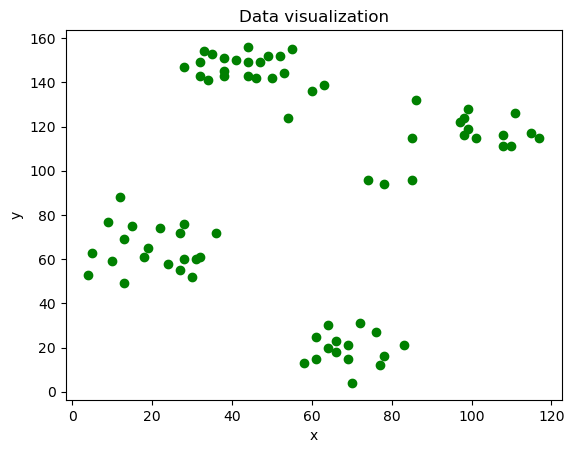

In [2]:
plt.scatter(df["x"], df["y"], color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data visualization");

#### Display boxplot of both x and y, to determine if there are any outliers:

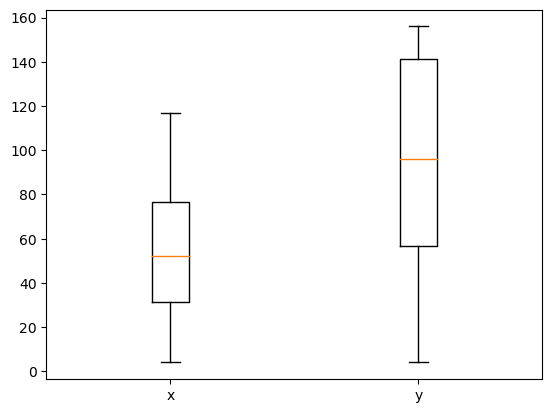

In [3]:
liste= df["x"], df["y"]
plt.boxplot(liste, labels=["x", "y"]);

It seems that there are no outliers in the dataset and we see from the scatterplot of the data points that there is likely to have optimal number of clusters as 4. However, to be sure, we can use the elbow method:


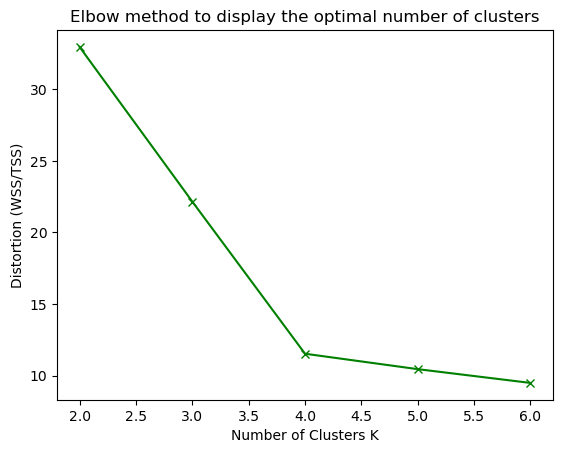

In [4]:
from scipy.spatial.distance import cdist
range_of_n_clusters= [2,3,4,5,6]
distortions=[]
for n_clusters in range_of_n_clusters:
    cluster=KMeans(n_clusters= n_clusters)
    cluster.fit(df)
    distortions.append(sum(np.min(cdist(df, cluster.cluster_centers_, "euclidean"), axis=1)/ np.size(df, axis=0)))

plt.plot(range_of_n_clusters, distortions, "gx-")
plt.xlabel("Number of Clusters K")
plt.ylabel("Distortion (WSS/TSS)")
plt.title("Elbow method to display the optimal number of clusters");

We see clearly the elbow point at 4. Therefore, we choose 4 as the n_clusters.




#### Train the dataset with kmeans algorithm with 4 clusters:

In [5]:
## Insert your code here
kmeans= KMeans(n_clusters=4)
kmeans.fit(df)
centroids= kmeans.cluster_centers_
labels= kmeans.labels_

### Display the clusters and the centroids in scatterplot:

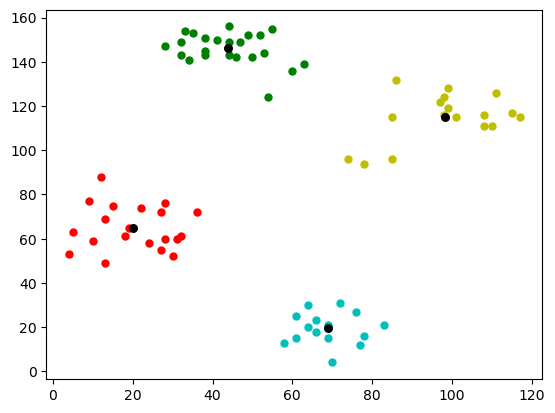

In [6]:
colors= ["g.", "r.", "y.", "c."]
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0], centroids[:,1], marker="o", color="black", s=30, zorder=10, linewidths=1);